In [36]:
import os
import json
from src.catching import attempt_catch
import matplotlib.pyplot as plt
from src.pokemon import PokemonFactory, StatusEffect
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd


N = 100

In [37]:
def initialize(filePath):
    factory = PokemonFactory("pokemon.json")
    
    with open(filePath, "r") as file:
        config = json.load(file)

    LEVEL = config["level"]
    STATUS = StatusEffect[config["status"]]
    HP_PERCENTAGE = config["hp_percentage"]

    jolteon = factory.create("jolteon", LEVEL, STATUS, HP_PERCENTAGE)
    caterpie = factory.create("caterpie", LEVEL, STATUS, HP_PERCENTAGE)
    snorlax = factory.create("snorlax", LEVEL, STATUS, HP_PERCENTAGE)
    onix = factory.create("onix", LEVEL, STATUS, HP_PERCENTAGE)
    mewtwo = factory.create("mewtwo", LEVEL, STATUS, HP_PERCENTAGE)

    pokemons = [jolteon, caterpie, snorlax, onix, mewtwo]
    pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]
    status_effects = [StatusEffect.NONE, StatusEffect.POISON, StatusEffect.BURN, StatusEffect.PARALYSIS, StatusEffect.SLEEP, StatusEffect.FREEZE]

    return (pokemons, pokeballs, status_effects)

Ejercicio 1A. Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales 
¿Cuál es la probabilidad de captura promedio para cada pokebola?

La idea es inicializar las propiedades de cada pokemon en sus condiciones ideales, es decir, la vida y su nivel al máximo y sin estado.
Una vez creados los pokemones y pokebolas, realizamos lo siguiente:
1. Por cada pokemon y pokebola realizamos un intento de captura.
2. Agregamos al DataFrame 'df' los datos conseguidos en una tabla con columnas 'pokemon', 'pokeball', 'success' simbolizando si fue capturado o no.

In [38]:
pokemons, pokeballs, _ = initialize("config/ejercicio1a-config.json")

# Creamos y llenamos el DataFrame
df = pd.DataFrame(columns=['pokemon', 'pokeball', 'success'])
for pokemon in pokemons:
    for pokeball in pokeballs:
        for _ in range(N):
            success, _ = attempt_catch(pokemon, pokeball)
            new_row = {'pokemon': pokemon.name, 'pokeball': pokeball, 'success': success}
            df.loc[len(df)] = new_row

# Calcular la media de atrapadas para cada Pokémon y pokebola.
media_por_pokeball_pokemon = df.groupby(['pokeball', 'pokemon'])['success'].mean().reset_index()
    
# Media para cada pokemon.
media_por_pokeball = df.groupby(['pokeball'])['success'].mean().reset_index() 


Para no perder datos, y además, poder comparar la eficiencia de cada pokebola según el pokemon a atrapar, 
agrupamos los datos en según la pokebola y el pokemon
Obtenemos la media de atrapadas para cada pokemon según la pokebola utilizada. 

In [39]:
media_por_pokeball_pokemon

,pokeball,pokemon,success
0,fastball,caterpie,0.30
1,fastball,jolteon,0.20
2,fastball,mewtwo,0.02
3,fastball,onix,0.04
4,fastball,snorlax,0.02
5,heavyball,caterpie,0.27
6,heavyball,jolteon,0.03
7,heavyball,mewtwo,0.00
8,heavyball,onix,0.12
9,heavyball,snorlax,0.06


Luego, y para responder el ejercicio calculamos el promedio de atrapadas de cada pokebola.

In [40]:
media_por_pokeball

,pokeball,success
0,fastball,0.116
1,heavyball,0.096
2,pokeball,0.102
3,ultraball,0.210


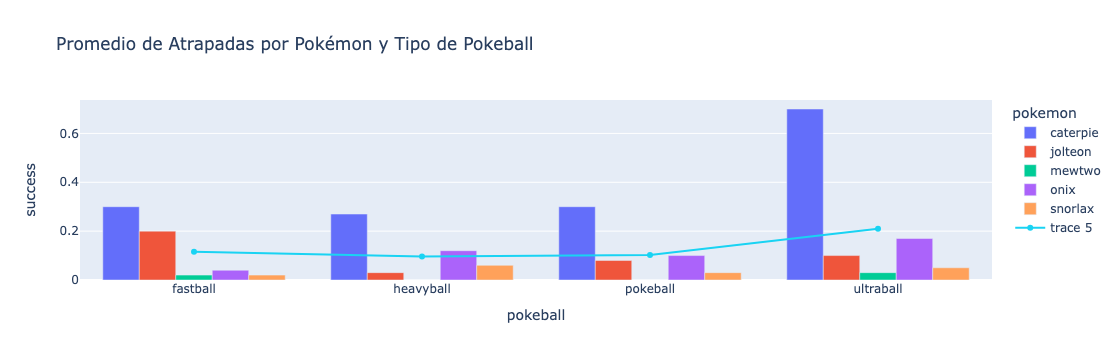

In [41]:
# Crear un gráfico de barras con Plotly Express
fig = px.bar(media_por_pokeball_pokemon, x='pokeball', y='success', color='pokemon', barmode='group', title='Promedio de Atrapadas por Pokémon y Tipo de Pokeball')
fig.add_trace(go.Scatter(x=media_por_pokeball['pokeball'], y=media_por_pokeball['success']))

# Mostrar el gráfico
fig.show()

***AGREGAR CONCLUSIÓN***

**Ejercicio 1b** ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrínsecas de cada Pokemon? 

Para poder llegar a alguna conclusión vamos a generar un DataFrame con los datos obtenidos del lanzamiento de cada pokebola, para cada pokemon. La tabla resultante tendrá como index el pokemon, la pokebola y si fue atrapado o no. 
A partir de la misma, agrupamos los datos según el pokemon y obtenemos la media de atrapadas para cada uno de ellos.
Como estamos buscando la eficiencia con respecto a la pokebola básica, cada media calculada se divide por la media básica.

In [42]:
pokemons, pokeballs, _ = initialize("config/ejercicio1b-config.json")

# Creamos y llenamos el DataFrame
df = pd.DataFrame(columns=['pokemon', 'pokeball', 'success'])
for pokemon in pokemons:
    for pokeball in pokeballs:
        for _ in range(N):
            success, _ = attempt_catch(pokemon, pokeball)
            new_row = {'pokemon': pokemon.name, 'pokeball': pokeball, 'success': success}
            df.loc[len(df)] = new_row

# Calcular la media de atrapadas para cada Pokémon
media_por_pokemon = df.groupby('pokemon')['success'].mean().reset_index()

# Calculamos la media de atrapadas para cada pokemon con la pokebola basica.
base_pokeball = df[df.pokeball == 'pokeball']
media_base_pokeball = base_pokeball.groupby('pokemon')['success'].mean()

media_por_pokemon = pd.DataFrame()
for pokeball in pokeballs:
    if pokeball != 'pokeball':
        current_ball_serie = df[df.pokeball == pokeball]
        media_current_ball = current_ball_serie.groupby('pokemon')['success'].mean() / media_base_pokeball
        media_current_ball = media_current_ball.reset_index()  # Reiniciar el índice aquí
        if media_por_pokemon.empty:
            media_por_pokemon = media_current_ball
        else:
            media_por_pokemon = media_por_pokemon.merge(media_current_ball, on='pokemon')   # Agregamos la nueva columna ('ultraball' o la que sea)



Ahora, graficamos los datos obtenidos.

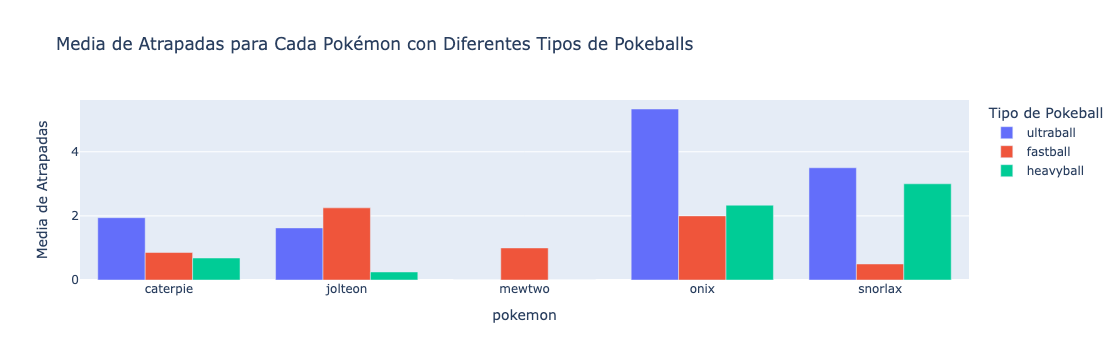

In [43]:
# Establecer el índice nuevamente en 'pokemon'
media_por_pokemon.columns = ['pokemon', 'ultraball', 'fastball', 'heavyball']

# Graficar
fig = px.bar(media_por_pokemon, x='pokemon', y=['ultraball', 'fastball', 'heavyball'], title='Media de Atrapadas para Cada Pokémon con Diferentes Tipos de Pokeballs', labels={'value': 'Media de Atrapadas', 'variable': 'Tipo de Pokeball'}, barmode='group')

# Mostrar el gráfico
fig.show()


Podemos ver que para snorlax la pokebola ideal es la 'heavyball', y teniendo en cuenta su gran peso tiene sentido que la 'fastball' no sea tan adecuada para tal pokemon. Con el mismo razonamiento, la 'heavyball' no tiene buena eficiencia con pokemons livianos.
Además, la 'ultraball' y 'fastball' son buenas opciónes para cualquiera de los cinco pokemons. Podemos pensar que son una pokebola mejor que la básica aunque. Sin embargo, no aporta una particularidad para atrapar los pokemons según sus propiedades intrínsecas.

**Ejercicio 2a** ¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es así, ¿Cuál es más o menos efectiva?


In [44]:
pokemons, pokeballs, status_effects = initialize("config/ejercicio2a-config.json")
factory = PokemonFactory("pokemon.json")

df = pd.DataFrame(columns=['pokemon', 'pokeball', 'status', 'success'])
for pokemon in pokemons:
    for pokeball in pokeballs:
        for current_status in status_effects:
            pokemon = factory.create(pokemon.name, pokemon.level, current_status, 1)
            for _ in range(N):
                success, _ = attempt_catch(pokemon, pokeball)
                new_row = {'pokemon': pokemon.name, 'pokeball': pokeball, 'status': current_status.name, 'success': success}
                df.loc[len(df)] = new_row

# Agrupar los datos por Pokémon y estado, y calcular la tasa de éxito promedio
grouped_df = df.groupby(['pokemon', 'status'])['success'].mean().reset_index()

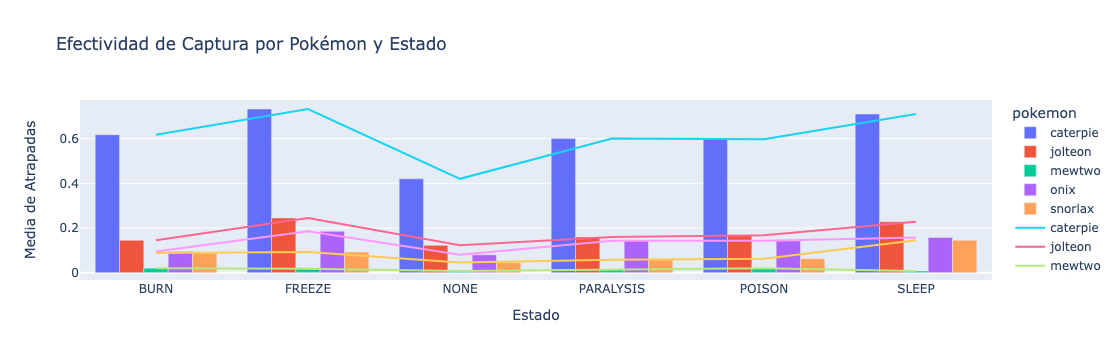

In [45]:
# Crear el gráfico de barras agrupadas
fig = px.bar(grouped_df, x='status', y='success', color='pokemon', title='Efectividad de Captura por Pokémon y Estado', barmode='group', labels={'success': 'Media de Atrapadas', 'status': 'Estado'})

# Agregar trazos de líneas para cada Pokémon
for pokemon in grouped_df['pokemon'].unique():
    pokemon_data = grouped_df[grouped_df['pokemon'] == pokemon]
    fig.add_trace(go.Scatter(x=pokemon_data['status'], y=pokemon_data['success'], mode='lines', name=pokemon))

# Mostrar el gráfico
fig.show()


**Ejercicio 2b** ¿Cómo afectan los puntos de vida a la efectividad de la captura?

Para responder esta duda vamos a utilizar dos pokemons: Snorlax y Caterpie. 
Vamos a lanzar cada pokebola 100 veces para cada pokemon y además, para cada efecto posible.
Luego, generamos el gráfico a partir de lo obtenido.

In [46]:
 factory = PokemonFactory("pokemon.json")
pokeballs = ["pokeball", "ultraball", "fastball", "heavyball"]

with open("config/ejercicio2b-config.json", "r") as file:
    config = json.load(file)
    
df_list = []
hp_steps = [x * 0.1 for x in range(0, 11)]
for current in config:
    df = pd.DataFrame(columns=['pokemon', 'pokeball', 'hp', 'success'])
    for hp in hp_steps:
        pokemon = factory.create(current['pokemon'], current['level'], StatusEffect[current["status"]], hp)
            
        for _ in range(N):
            for pokeball in pokeballs:
                success, _ = attempt_catch(pokemon, pokeball)
                new_row = {'pokemon': pokemon.name, 'pokeball': pokeball, 'hp': hp, 'success': success}
                df.loc[len(df)] = new_row
            
    # Para un mismo pokemon.
    media_base_por_hp = df[df.pokeball == 'pokeball']['success'].mean()

    # Eficiencia como promedio de la pokebola básica
    efficiency_for_pokemon = df.groupby('hp')['success'].mean() / media_base_por_hp

    # Agregar los datos al DataFrame de la lista
    df['efficiency'] = df['hp'].map(efficiency_for_pokemon)
    df_list.append(df)

# Concatenar todos los DataFrames en uno solo
final_df = pd.concat(df_list)


In [47]:
final_df

,pokemon,pokeball,hp,success,efficiency
0,caterpie,pokeball,0.0,True,1.485152
1,caterpie,ultraball,0.0,True,1.485152
2,caterpie,fastball,0.0,True,1.485152
3,caterpie,heavyball,0.0,True,1.485152
4,caterpie,pokeball,0.0,True,1.485152
...,...,...,...,...,...
4395,snorlax,heavyball,1.0,False,0.902985
4396,snorlax,pokeball,1.0,False,0.902985
4397,snorlax,ultraball,1.0,False,0.902985
4398,snorlax,fastball,1.0,False,0.902985


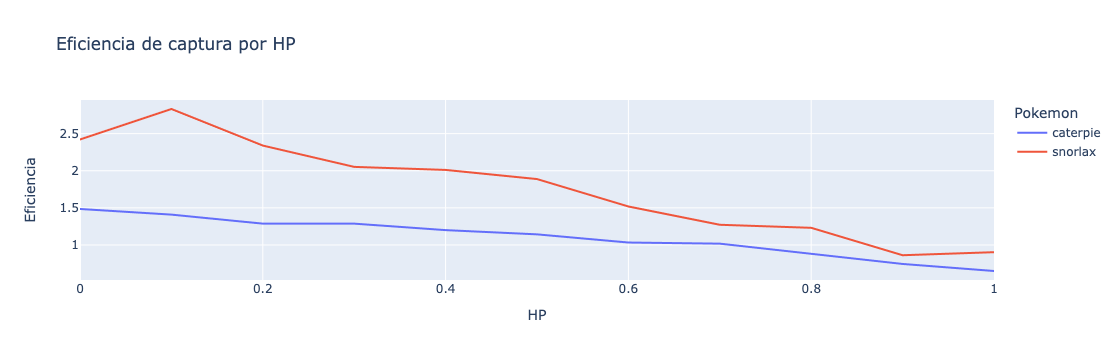

In [48]:
# Graficar con Plotly Express
fig = px.line(final_df, x='hp', y='efficiency', color='pokemon', line_group='pokemon', labels={'efficiency': 'Eficiencia', 'hp': 'HP', 'pokemon': 'Pokemon'}, title='Eficiencia de captura por HP')
fig.show()

Se puede ver en el gráfico que, para estos dos pokemons, mientras mas vida tienen mas dificil será la captura del mismo. 
Además, observando la diferencia entre la eficiencia de captura con vida máxima y mínima para Caterpie, no es muy elevada. 
Sin embargo, en el caso de Snorlax la diferencia es acentuada. Por ende, podemos pensar que, si bien la vida afecta la eficiencia de captura, también depende mucho sobre que pokemon se trata el intento de captura.